# Claude VLM for bounding-box segmentation

In this notebook we will use the vision language model [claude](https://claude.ai) to determine bounding-boxes around objects.

In [1]:
import anthropic
from skimage.io import imread
import stackview
from image_utilities import numpy_to_bytestream, extract_json
from prompt_utilities import prompt_anthropic
import base64
import json
import os
import pandas as pd
from skimage.io import imsave


## Bounding box segmentation
Models such as claude have some capabilities and can detect objects and tell us about their positions and size.

StackViewNDArray([[ 8,  8,  8, ..., 10,  9,  9],
                  [ 8,  8,  7, ..., 10, 11, 10],
                  [ 9,  8,  8, ...,  9, 10,  9],
                  ...,
                  [ 9,  8,  9, ...,  9,  9,  8],
                  [ 9,  8,  8, ...,  9,  9,  9],
                  [ 8,  8,  9, ..., 10,  9,  9]], dtype=uint8)
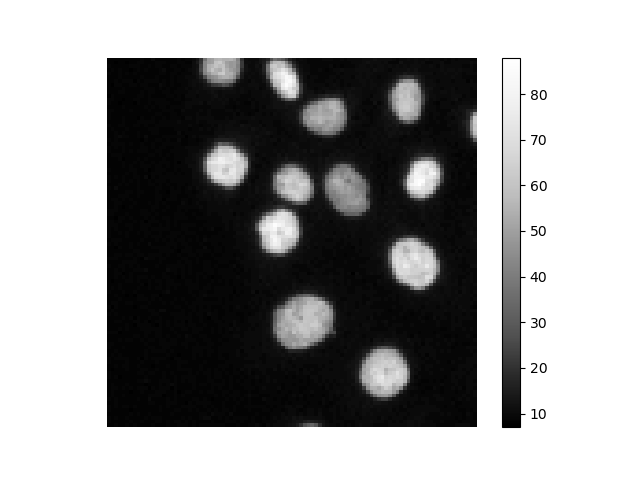
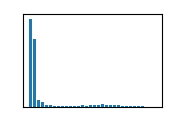

In [2]:
import stackview
from skimage import data
import numpy as np

# Load the human mitosis dataset
image = data.human_mitosis()[:100, :100]

stackview.insight(image)

In [3]:
reply = prompt_anthropic("""
Give me a json object of bounding boxes around ALL bright blobs in this image. Assume the image width and height are 1. 
The format should be like this: 

```json
[
    {'x':float,'y':float, 'width': float, 'height': float},
    {'x':float,'y':float, 'width': float, 'height': float},
    ...
]
```

If you think you can't do this accuratly, please try anyway.
""", image)
print(reply)
bb = json.loads(extract_json(reply))
bb

new_image = stackview.add_bounding_boxes(image, bb)

I'll analyze this image and provide bounding boxes for the bright blobs. The image shows several white/bright circular blobs against a black background.

Here's my attempt to identify the bounding boxes around all bright blobs in the image:

```json
[
    {"x": 0.191, "y": 0.111, "width": 0.068, "height": 0.068},
    {"x": 0.313, "y": 0.161, "width": 0.068, "height": 0.068},
    {"x": 0.387, "y": 0.284, "width": 0.068, "height": 0.068},
    {"x": 0.254, "y": 0.377, "width": 0.068, "height": 0.068},
    {"x": 0.508, "y": 0.198, "width": 0.068, "height": 0.068},
    {"x": 0.640, "y": 0.173, "width": 0.068, "height": 0.068},
    {"x": 0.735, "y": 0.272, "width": 0.068, "height": 0.068},
    {"x": 0.191, "y": 0.481, "width": 0.068, "height": 0.068},
    {"x": 0.367, "y": 0.494, "width": 0.068, "height": 0.068},
    {"x": 0.528, "y": 0.377, "width": 0.068, "height": 0.068},
    {"x": 0.640, "y": 0.432, "width": 0.068, "height": 0.068},
    {"x": 0.132, "y": 0.272, "width": 0.068, "height": 

StackViewNDArray([[[ 3,  3,  3],
                   [ 3,  3,  3],
                   [ 3,  3,  3],
                   ...,
                   [ 9,  9,  9],
                   [ 6,  6,  6],
                   [ 6,  6,  6]],

                  [[ 3,  3,  3],
                   [ 3,  3,  3],
                   [ 0,  0,  0],
                   ...,
                   [ 9,  9,  9],
                   [12, 12, 12],
                   [ 9,  9,  9]],

                  [[ 6,  6,  6],
                   [ 3,  3,  3],
                   [ 3,  3,  3],
                   ...,
                   [ 6,  6,  6],
                   [ 9,  9,  9],
                   [ 6,  6,  6]],

                  ...,

                  [[ 6,  6,  6],
                   [ 3,  3,  3],
                   [ 6,  6,  6],
                   ...,
                   [ 6,  6,  6],
                   [ 6,  6,  6],
                   [ 3,  3,  3]],

                  [[ 6,  6,  6],
                   [ 3,  3,  3],
                   [ 3,  3,  3],
                   ...,
                   [ 6,  6,  6],
                   [ 6,  6,  6],
                   [ 6,  6,  6]],

                  [[ 3,  3,  3],
                   [ 3,  3,  3],
                   [ 6,  6,  6],
                   ...,
                   [ 9,  9,  9],
                   [ 6,  6,  6],
                   [ 6,  6,  6]]], dtype=uint8)
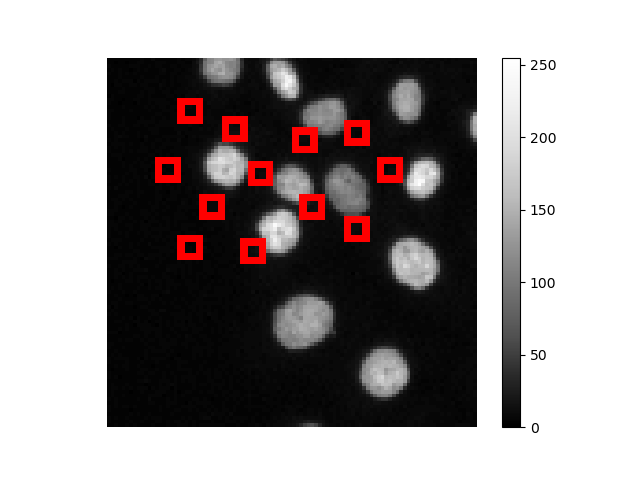
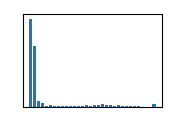

In [4]:
new_image